<a href="https://colab.research.google.com/github/BaharehAm/Python-tutorials-for-Advanced-Data-Mining/blob/main/Tutorial_5_Ensemble_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains a few ensemle methods for the classification problem but the use of ensemble methods is not limited to the classification problems. They can be used for the case of regression as well.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from google.colab import files

## Data

In [ ]:

## Load the dataset and create a dataframe
data_to_load = files.upload()
df = pd.read_csv('diabetes.csv')
df.head(10)


## Replace the zeros with "NaN"
df[["BMI"]]=df[["BMI"]].replace(0,np.NaN)
df[["Insulin"]]=df[["Insulin"]].replace(0,np.NaN)

## Replace the "NaN" values with the mean
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)


## Normalize the numeric features
SC = StandardScaler()
X_to_be_SC = df.drop(['Outcome','Social smoker','Social drinker'], axis=1)
X_CS = SC.fit_transform(X_to_be_SC)
X_CS
X_to_be_SC.columns
X_SC = pd.DataFrame(X_CS, columns=X_to_be_SC.columns)
X_SC.head()


## Specify the feature and target datasets [X and y]
X = pd.concat([X_SC, df[['Social smoker','Social drinker']] ], axis=1 )
y = df[['Outcome']]


Saving diabetes.csv to diabetes (1).csv


## Models from previous tutorials

In [ ]:
## Define models and the range of hyper-parameters

from sklearn.neighbors import KNeighborsClassifier
model_KNN =  KNeighborsClassifier()
parameters_KNN = {'n_neighbors' : range(1,20)}


from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
parameters_LR = {'C' : np.logspace(-2, 2, 10)}


from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
parameters_GNB = {'var_smoothing': np.logspace(0,-9, num=100)}


from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
parameters_DT = {'criterion' : ['gini', 'entropy'],
                'max_leaf_nodes' : [2, 10, 100],
                'min_samples_split' : [2, 10, 100],
                'max_depth': list(range(3,10)),
                'min_samples_leaf' : [1, 2]
                }

from sklearn import svm
model_SVM = svm.SVC()
parameters_SVM = {'C': list(np.logspace(-2, 4, 7)),
                'gamma': list(np.logspace(-4, 2, 7)),
                'kernel': ['rbf']
                }


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics


## Define a function that tunes(validates) and evaluates the models.

def tune_evaluate(n_splits, model, parameters, X, y, random_state):

  ## data split (80% for training, 20% for testing)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

  ## hyper-parameter tuning using Grid Search CV
  cv_method = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=random_state)
  clf_GridSearchCV = GridSearchCV(estimator=model,
                      param_grid=parameters,
                      cv=cv_method,
                      verbose=1,
                      scoring='accuracy')
  clf_GridSearchCV.fit(X_train, np.ravel(y_train))

  ## Evaluating on test set
  model.set_params(**clf_GridSearchCV.best_params_)
  model = model.fit(X_train, np.ravel(y_train))
  y_pred = model.predict(X_test)
  test_accuracy = metrics.accuracy_score(y_test, y_pred)

  return clf_GridSearchCV.best_params_, clf_GridSearchCV.best_score_, y_pred, test_accuracy, y_test

In [ ]:
## Call the function for all models with a specific random_state

random_state = 42
n_splits = 5
models_parameters = [
                     (model_KNN, parameters_KNN),
                     (model_LR, parameters_LR),
                     (model_GNB, parameters_GNB),
                     (model_DT, parameters_DT),
                     (model_SVM, parameters_SVM)
                     ]

predictions = [] # this empty list will be populated by the y_pred of all 5 models
for model, parameters in models_parameters:  # iterate over items of the list
  results = tune_evaluate(n_splits, model, parameters, X, y, random_state)
  best_params = results[0]
  CV_score = results[1]
  y_pred = results[2]
  test_accuracy = results[3]

  print(type(model).__name__, best_params, CV_score, test_accuracy)
  print('\n')

  predictions.append(y_pred)


Fitting 5 folds for each of 19 candidates, totalling 95 fits
KNeighborsClassifier {'n_neighbors': 13} 0.7825 0.71


Fitting 5 folds for each of 10 candidates, totalling 50 fits
LogisticRegression {'C': 0.0774263682681127} 0.79 0.7


Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB {'var_smoothing': 0.3511191734215131} 0.78 0.69


Fitting 5 folds for each of 252 candidates, totalling 1260 fits
DecisionTreeClassifier {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.8099999999999999 0.72


Fitting 5 folds for each of 49 candidates, totalling 245 fits
SVC {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'} 0.7899999999999999 0.75




In [ ]:
print(predictions)

[array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
## Create a data frame from the prediction values

predictions_df = pd.DataFrame(predictions)
predictions_df
predictions_final = predictions_df.T
predictions_final
predictions_final.columns=['KNN', 'LR', 'GNB', 'DT', 'SVM']
predictions_final

,KNN,LR,GNB,DT,SVM
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
95,0,0,0,0,0
96,0,0,0,0,0
97,0,0,0,0,0
98,0,0,1,0,0


## Majority Voting

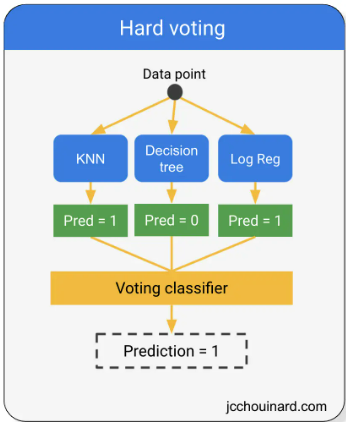

In [ ]:
## Majority Voting

from sklearn.ensemble import VotingClassifier

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

models = [
    ('KNN', KNeighborsClassifier(n_neighbors=13)),
    ('LR', LogisticRegression(C=0.0774)),
    ('GNB', GaussianNB(var_smoothing=0.351)),
    ('DT', DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=10)),
    ('SVM', svm.SVC(C=100.0, gamma=0.001, kernel='rbf'))
    ]


Majority_Voting = VotingClassifier(estimators=models)
Majority_Voting

Majority_Voting = Majority_Voting.fit(X_train, np.ravel(y_train))
y_pred_MV = Majority_Voting.predict(X_test)
metrics.accuracy_score(y_test, y_pred_MV)

0.7

In [ ]:
y_pred_MV

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
## Add new predictions to the prediction data frame

predictions_final['Majority_Voting'] = y_pred_MV
predictions_final

# predictions_final.loc[[6]]

,KNN,LR,GNB,DT,SVM,Majority_Voting
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1
...,...,...,...,...,...,...
95,0,0,0,0,0,0
96,0,0,0,0,0,0
97,0,0,0,0,0,0
98,0,0,1,0,0,0


## Weighted Majority Voting

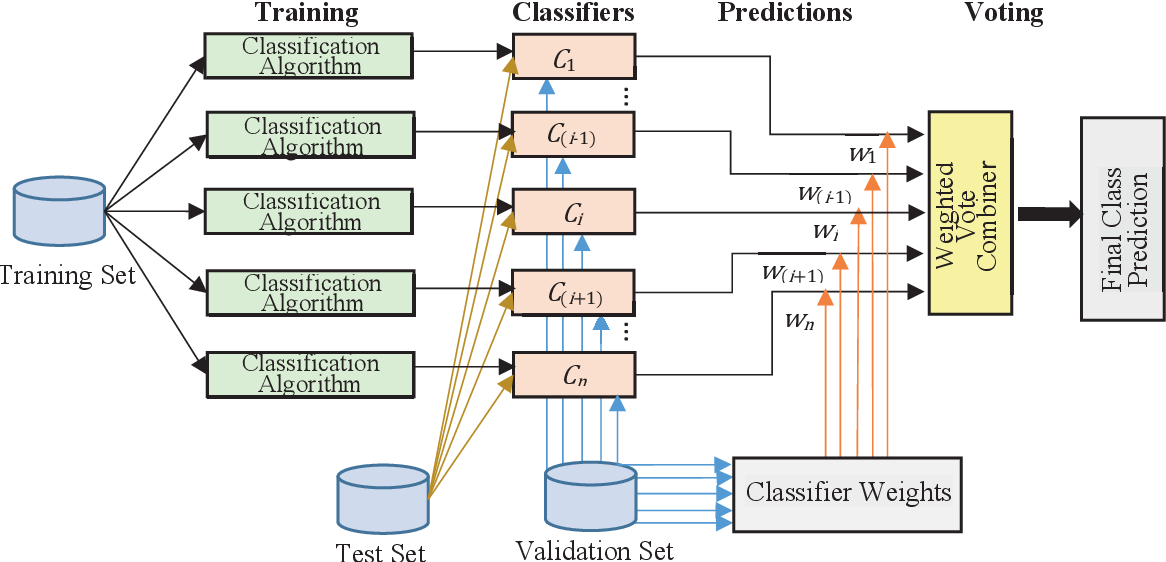
[Ref](https://www.semanticscholar.org/paper/A-Weighted-Majority-Voting-Ensemble-Approach-for-Dogan-Birant/e2600cbc04da3284b61ef72223403f1dca3d2a98)

In [ ]:
## Weighted Majority Voting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


# weights=[0.78, 0.79, 0.78, 0.81, 0.79 ]  ## Weights can be defined based on CV_score of each model
weights=[0.1, 0.1, 0.1, 0.6, 0.1 ]

W_Majority_Voting = VotingClassifier(estimators=models, weights=weights)
W_Majority_Voting

W_Majority_Voting = W_Majority_Voting.fit(X_train, np.ravel(y_train))
y_pred_WMV = W_Majority_Voting.predict(X_test)
metrics.accuracy_score(y_test, y_pred_WMV)


0.71

In [ ]:
y_pred_WMV

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
## Add new predictions to the prediction data frame

predictions_final['W_Majority_Voting'] = y_pred_WMV
predictions_final

predictions_final.loc[[6]]

,KNN,LR,GNB,DT,SVM,Majority_Voting,W_Majority_Voting
6,1,0,0,0,1,0,0


## Bagging & Boosting

**Boosting** is a general ensemble method that creates a **strong classifier** from a number of **weak classifiers**.
The main idea behind boosting is to assign higher weights to misclassified examples in each iteration to make sure that the next weak model focuses more on these examples. This way, the final model focuses more on the difficult examples and thus produces better predictions.

Models are added until the training set is predicted perfectly or a maximum number of models are added.

The final prediction output is calculated as the weighted sum of the predictions of all the models. The weights of the models are chosen in such a way that the final prediction has the least possible error.

**Bagging** (Bootstrap Aggregating) involves creating multiple copies of the training data set by randomly **sampling with replacement**, and using each sample to train a separate model. Replacement means that a sample drawn from the dataset is replaced, allowing it to be selected again and perhaps multiple times in the new sample. This means that the sample may have duplicate examples from the original dataset.Each model in the ensemble is trained on a different subset of the data, and therefore has different errors and biases. By combining the predictions of all the models in the ensemble, bagging can improve the accuracy and robustness of the final predictions.

Bagging is commonly used with decision trees, but can be applied to other machine learning algorithms as well.


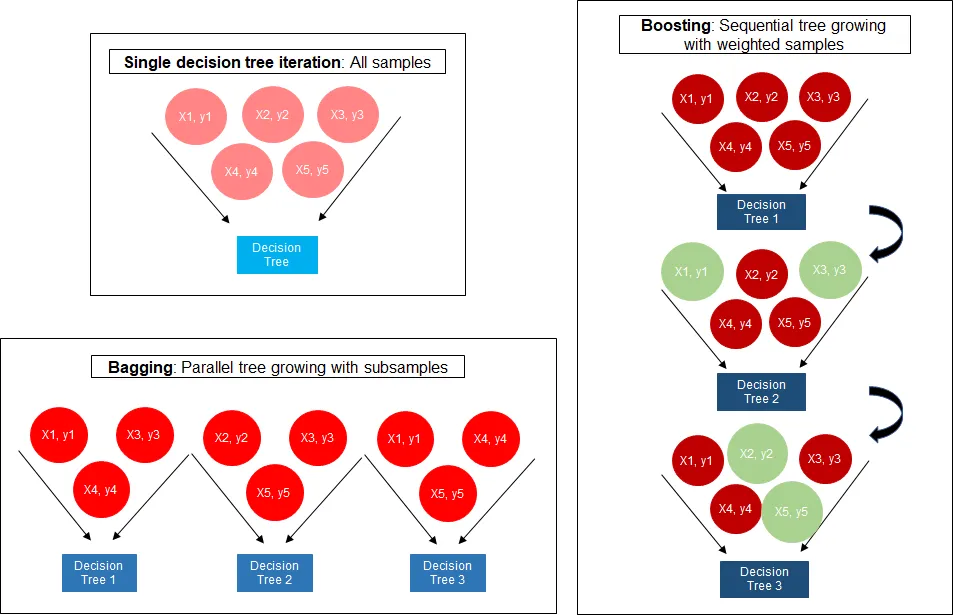
[Ref](https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f)

### Random Forest: a bagging method

A **random forest** is a collection of trees, all of which are trained independently and on different subsets of instances and features.

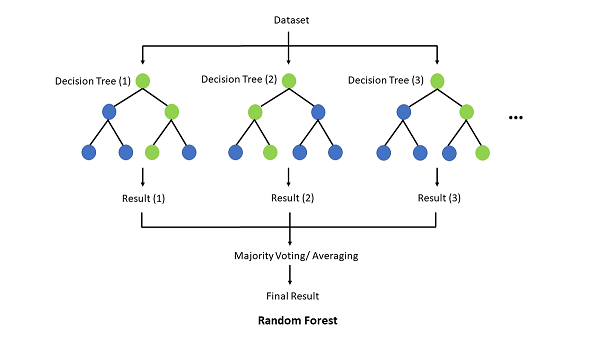

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
parameters_RF = {
 'bootstrap': [True, False],
 'max_depth': [10, 20],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100, 200]
 }

results_RF = tune_evaluate(5, model_RF, parameters_RF, X, y, random_state)
results_RF

Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'bootstrap': True,
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 0.8125,
 array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 0.7,
      Outcome
 443        0
 94         0
 440        0
 371        0
 405        1
 ..       ...
 31         0
 370        1
 175        1
 439        0
 273        1
 
 [100 rows x 1 columns])

### AdaBoost: a boosting method

**Adaboost** (Adaptive Boosting) is an iterative and a type of boosting algorithm that trains a sequence of weak learners. In each iteration of the algorithm, the weak learner is trained on a weighted version of the training data, with more emphasis placed on the data points that were misclassified by the previous weak learner. The final model is created by combining the outputs of all the weak learners. The key idea behind Adaboost is that by iteratively focusing on the misclassified data points, the algorithm can improve the overall performance of the model.

The most suited and therefore most common algorithm used with AdaBoost are **decision trees with one level** (**decision stumps**).

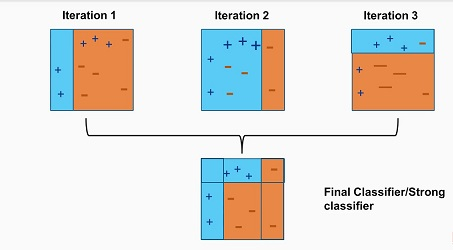

**Hyper-parameters**: `Learning rate`, simply means how fast the model learns. The lower the learning rate, the slower the model learns. The advantage of slower learning rate is that the model becomes more robust and efficient. In statistical learning, models that learn slowly perform better. However, learning slowly comes at a cost. It takes more time to train the model which brings us to the other significant hyperparameter. `n_estimator` is the number of trees used in the model. If the learning rate is low, we need more trees to train the model. However, we need to be very careful at selecting the number of trees. It creates a high risk of overfitting to use too many trees.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# weak learner
dt = DecisionTreeClassifier(max_depth=1)  # decision stumps

# Create an AdaBoostClassifier object
model_ab = AdaBoostClassifier(dt)
parameters_ab = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
      }

results_ab = tune_evaluate(5, model_ab, parameters_ab,  X, y, random_state)
results_ab

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'learning_rate': 0.1, 'n_estimators': 50},
 0.7925,
 array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 0.74,
      Outcome
 443        0
 94         0
 440        0
 371        0
 405        1
 ..       ...
 31         0
 370        1
 175        1
 439        0
 273        1
 
 [100 rows x 1 columns])

### Gradient boosted trees: a boosting method

The algorithm works by building trees iteratively, where each new tree tries to correct the **errors** of the previous tree. Specifically, the algorithm uses a loss function to detect the residuals (the difference between the predicted and actual values). For instance, mean squared error (MSE) can be used for a regression task and logarithmic loss (log loss) can be used for classification tasks. It then builds a decision tree to predict the residuals, rather than the actual target variable, and adds this tree to the ensemble. The existing trees in the model do not change when a new tree is added. The added decision tree fits the residuals from the current model.

The trees are built sequentially, with each new tree learning from the residuals of the previous tree. The algorithm uses a gradient descent optimization method to find the best set of tree parameters that minimize the loss function.

In the end, the final model is a combination of all the decision trees, with each tree contributing to the final prediction. The prediction of the model is the sum of the predictions of all the individual trees.

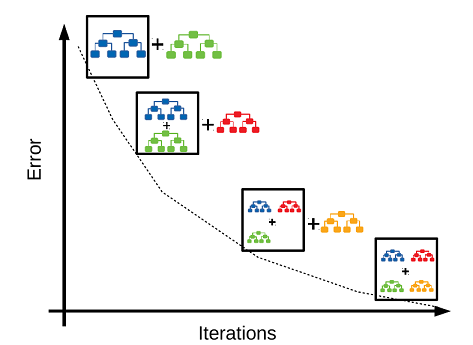

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
parameters_gb = {
    'n_estimators': [50, 100, 150], # number of trees
    'learning_rate': [0.01, 0.1, 1], # means how fast the model learns
    'max_depth': [2, 3, 4]
      }

results_gb = tune_evaluate(5, model_gb, parameters_gb, X, y, random_state)
results_gb

Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50},
 0.8025,
 array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 0.73,
      Outcome
 443        0
 94         0
 440        0
 371        0
 405        1
 ..       ...
 31         0
 370        1
 175        1
 439        0
 273        1
 
 [100 rows x 1 columns])

## Comparison of the models

In [ ]:
import random

## a function that generates a random number between 0 and 100
def randint(min=0, max=100):
    a = random.randint(min,max)
    return a

In [ ]:
randint()

58

In [ ]:
randomlist = []
for i in range(30):
  a = randint()
  randomlist.append(a)

print(randomlist)

[27, 66, 85, 43, 32, 47, 69, 81, 66, 88, 4, 62, 11, 80, 16, 91, 23, 16, 15, 77, 10, 36, 94, 68, 96, 15, 53, 50, 99, 6]


In [ ]:
## create a list of 30 random numbers
randomlist = [randint() for i in range(30)]
print(randomlist)

[2, 91, 51, 49, 25, 29, 63, 4, 96, 80, 96, 95, 94, 68, 99, 95, 86, 66, 45, 14, 57, 99, 34, 25, 93, 34, 18, 79, 28, 84]


In [ ]:
n_splits = 5
n_run = 10
models_parameters = [
                     (model_KNN, parameters_KNN),
                     (model_LR, parameters_LR),
                     (model_GNB, parameters_GNB),
                     (model_DT, parameters_DT),
                     (model_SVM, parameters_SVM),
                     (model_RF, parameters_RF),
                     (model_gb, parameters_gb),
                     (model_ab, parameters_ab)
                     ]

results_final = []
for random_state in randomlist[:n_run]:
  for model, parameters in models_parameters:
    results = tune_evaluate(n_splits, model, parameters, X, y, random_state)
    test_accuracy = results[3]
    y_pred = results[2]
    y_test = results[4]
    TP = confusion_matrix(y_test, y_pred)[0, 0]
    FP = confusion_matrix(y_test, y_pred)[1, 0]
    TN = confusion_matrix(y_test, y_pred)[1, 1]
    FN = confusion_matrix(y_test, y_pred)[0, 1]
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(TN+FP)
    results_middle = [random_state, type(model).__name__, test_accuracy, Sensitivity, Specificity]
    results_final.append(results_middle)

results_final_df = pd.DataFrame(results_final, columns=['random_state', 'Model', 'test_accuracy', 'Sensitivity', 'Specificity'])
results_final_df

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 19 candidates, totalling 95 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 

,random_state,Model,test_accuracy,Sensitivity,Specificity
0,2,KNeighborsClassifier,0.82,0.955224,0.545455
1,2,LogisticRegression,0.77,0.940299,0.424242
2,2,GaussianNB,0.74,0.865672,0.484848
3,2,DecisionTreeClassifier,0.77,0.820896,0.666667
4,2,SVC,0.77,0.940299,0.424242
...,...,...,...,...,...
75,80,DecisionTreeClassifier,0.63,0.626866,0.636364
76,80,SVC,0.76,0.850746,0.575758
77,80,RandomForestClassifier,0.71,0.791045,0.545455
78,80,GradientBoostingClassifier,0.71,0.776119,0.575758


In [ ]:
## Filter the results to have each models' results separately
results_KNN = results_final_df[results_final_df['Model']=='KNeighborsClassifier']
results_LR = results_final_df[results_final_df['Model']=='LogisticRegression']
results_GNB = results_final_df[results_final_df['Model']=='GaussianNB']
results_DT = results_final_df[results_final_df['Model']=='DecisionTreeClassifier']
results_SVM = results_final_df[results_final_df['Model']=='SVC']
results_RF = results_final_df[results_final_df['Model']=='RandomForestClassifier']
results_GB = results_final_df[results_final_df['Model']=='GradientBoostingClassifier']
results_AB = results_final_df[results_final_df['Model']=='AdaBoostClassifier']

In [ ]:
results_KNN

,random_state,Model,test_accuracy,Sensitivity,Specificity
0,2,KNeighborsClassifier,0.82,0.955224,0.545455
8,91,KNeighborsClassifier,0.75,0.805970,0.636364
16,51,KNeighborsClassifier,0.72,0.835821,0.484848
24,49,KNeighborsClassifier,0.83,0.940299,0.606061
32,25,KNeighborsClassifier,0.69,0.835821,0.393939
40,29,KNeighborsClassifier,0.81,0.955224,0.515152
48,63,KNeighborsClassifier,0.81,0.940299,0.545455
56,4,KNeighborsClassifier,0.83,0.925373,0.636364
64,96,KNeighborsClassifier,0.72,0.835821,0.484848
72,80,KNeighborsClassifier,0.70,0.820896,0.454545


In [ ]:
## descriptive statistics for the results

eveluation_results = [results_KNN, results_LR, results_GNB, results_DT, results_SVM, results_RF, results_GB, results_AB]

for evaluation_result in eveluation_results:
  print('Statistics of results for the', evaluation_result.iloc[0]['Model'],'in {} runs'.format(n_run))
  print(evaluation_result.describe().T.drop(['count','25%','50%','75%'], axis = 1).drop("random_state", axis=0), '\n')


Statistics of results for the KNeighborsClassifier in 10 runs
                   mean       std       min       max
test_accuracy  0.768000  0.057310  0.690000  0.830000
Sensitivity    0.885075  0.062556  0.805970  0.955224
Specificity    0.530303  0.079855  0.393939  0.636364 

Statistics of results for the LogisticRegression in 10 runs
                   mean       std       min       max
test_accuracy  0.786000  0.048808  0.720000  0.880000
Sensitivity    0.904478  0.053676  0.820896  1.000000
Specificity    0.545455  0.076927  0.424242  0.636364 

Statistics of results for the GaussianNB in 10 runs
                   mean       std       min       max
test_accuracy  0.754000  0.053583  0.680000  0.820000
Sensitivity    0.873134  0.064581  0.746269  0.955224
Specificity    0.512121  0.108274  0.242424  0.606061 

Statistics of results for the DecisionTreeClassifier in 10 runs
                   mean       std       min       max
test_accuracy  0.742000  0.050067  0.630000  0.800000


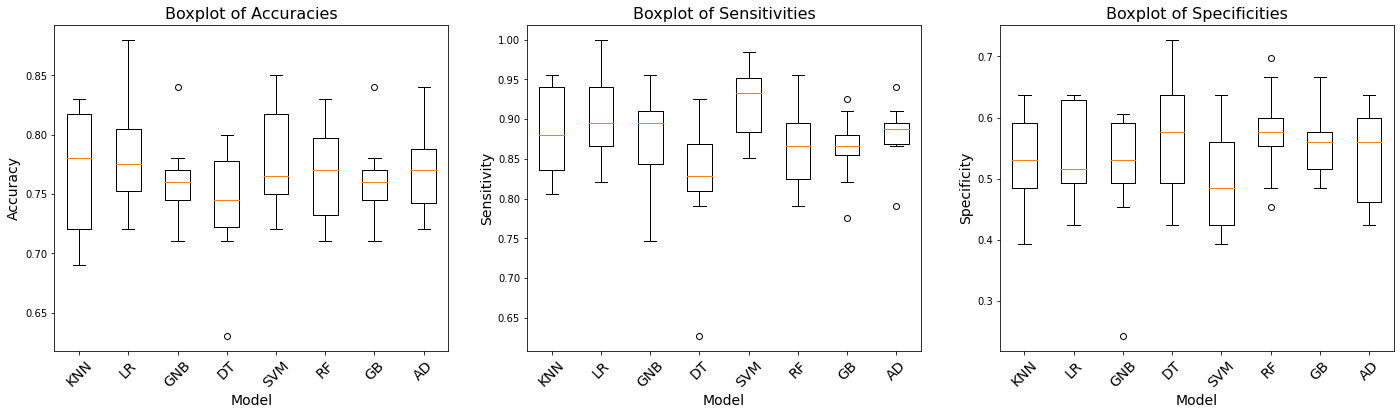

In [ ]:
## Box Plots
model_names = ['KNN', 'LR', 'GNB', 'DT', 'SVM', 'RF', 'GB', 'AD']
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(24, 6))
ax1.boxplot([results_KNN.test_accuracy, results_LR.test_accuracy ,results_GB.test_accuracy, results_DT.test_accuracy, results_SVM.test_accuracy,
             results_RF.test_accuracy, results_GB.test_accuracy, results_AB.test_accuracy
             ])
ax1.set_title('Boxplot of Accuracies', size=16) # Title
ax1.set_ylabel('Accuracy', fontsize = 14) # Y label
ax1.set_xlabel('Model', fontsize = 14) # X label
ax1.set_xticklabels(model_names, rotation=45, fontsize=14)

ax2.boxplot([results_KNN.Sensitivity, results_LR.Sensitivity ,results_GNB.Sensitivity, results_DT.Sensitivity, results_SVM.Sensitivity,
             results_RF.Sensitivity, results_GB.Sensitivity, results_AB.Sensitivity
             ])
ax2.set_title('Boxplot of Sensitivities', size=16)
ax2.set_ylabel('Sensitivity', fontsize = 14)
ax2.set_xlabel('Model', fontsize = 14)
ax2.set_xticklabels(model_names, rotation=45, fontsize=14)


ax3.boxplot([results_KNN.Specificity, results_LR.Specificity ,results_GNB.Specificity, results_DT.Specificity, results_SVM.Specificity,
             results_RF.Specificity, results_GB.Specificity, results_AB.Specificity
             ])
ax3.set_title('Boxplot of Specificities', size=16)
ax3.set_ylabel('Specificity', fontsize = 14)
ax3.set_xlabel('Model', fontsize = 14)
ax3.set_xticklabels(model_names, rotation=45, fontsize=14)

plt.show()